## Ciclos de vida de las cigarras

In [6]:
# Preámbulo
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

In [ ]:
# Parámetros
# Parámetros variables
L = list(range(2,21)) # Longitudes del ciclo
alfa = [0.9, 0.95, 0.99] # Ratio de supervivencia
# Parámetros fijos
K = 10000 # Capacidad total de carga
x0 = 100 # Población inicial de ninfas
f = 10 # Ninfas por cigarra
R = 0.95 # Factor de relajación de los depredadores
A = 0.042 # Factor de respuesta de los depredadores a la emergencia anterior
n = 200 # Años a simular
P0 = 10 # Umbral inicial de depredadores

In [8]:
# Funciones de evolución de la población
def calc_Pn(df, i, R, A, alfa, L): # Cálculo del umbral de depredación
    Pn = R * df.loc[max(0, i-1), 'P'] + A * df.loc[max(0, i-1-L), 'x'] * pow(alfa, L)
    return ceil(Pn)

def calc_Hn(df, i, f, alfa, L): # Número de ninfas producidas
    Hn = f * max((df.loc[max(0, i), 'Emergentes'] - df.loc[i, 'P']), 0)
    return ceil(Hn)

def calc_Kn(df, i, K, L, alfa): # Carga residual
    sum = 0
    for j in range(1, L):
        sum += df.loc[max(0, i-j), 'x'] * pow(alfa, j)
    Kn = K - sum
    if Kn < 0:
        return 0
    return ceil(Kn)

def calc_emergentes(df, i, alfa, L): # Número de adultas emergentes
    return ceil(df.loc[max(i-L,0), 'x'] * pow(alfa, L))

def calc_xn(df, i): # Ninfas puestas
    return ceil(min(df.loc[i, 'K res'], df.loc[i, 'H']))

In [9]:
# Funciones de simulación y graficación
def simulacion(x0, P0, K, n, A, R, alfa, L, f): # Simula y genera un DataFrame con los resultados
    df = pd.DataFrame(index=range(n), columns=['x', 'P', 'K res', 'H', 'Emergentes'])
    df.loc[0, 'x'] = x0
    df.loc[0, 'P'] = P0
    df.loc[0, 'K res'] = K - x0
    df.loc[0, 'Emergentes'] = calc_emergentes(df, 0, alfa, L)
    df.loc[0, 'H'] = calc_Hn(df, 0, f, alfa, L)

    for i in range(1, n):
        df.loc[i, 'Emergentes'] = calc_emergentes(df, i, alfa, L)
        df.loc[i, 'P'] = calc_Pn(df, i, R, A, alfa, L)
        df.loc[i, 'H'] = calc_Hn(df, i, f, alfa, L)
        df.loc[i, 'K res'] = calc_Kn(df, i, K, L, alfa)
        df.loc[i, 'x'] = calc_xn(df, i)

    return df

def graficar(df, alfa, L):  # Genera un gráfico de lineas de la emergencia anual
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['Emergentes'], color='blue')
    ax.set_title(f"Emergencia anual para los parámetros alfa={alfa}, L={L}")
    ax.set_xlabel('Año')
    ax.set_ylabel('Emergentes')
    ax.grid(True)
    plt.show()

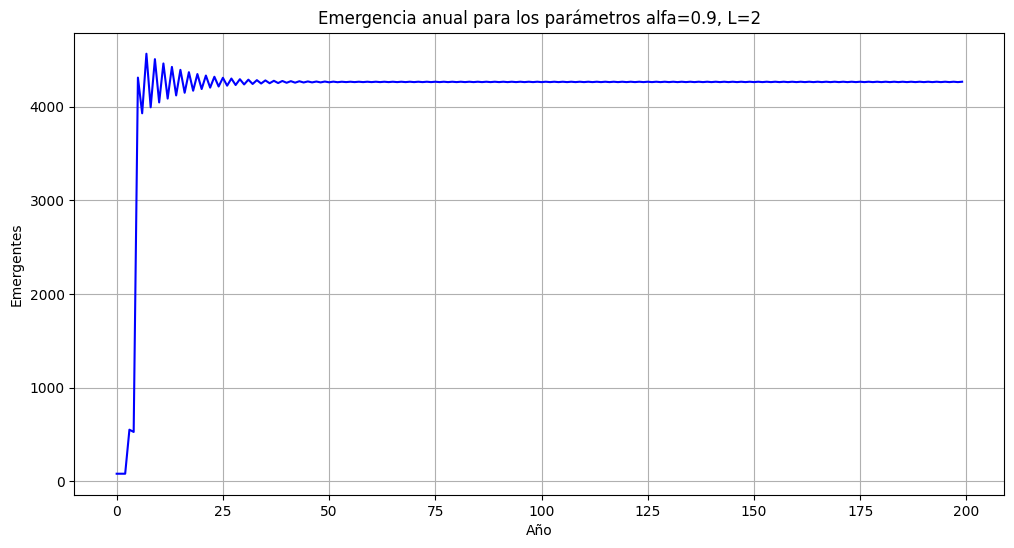

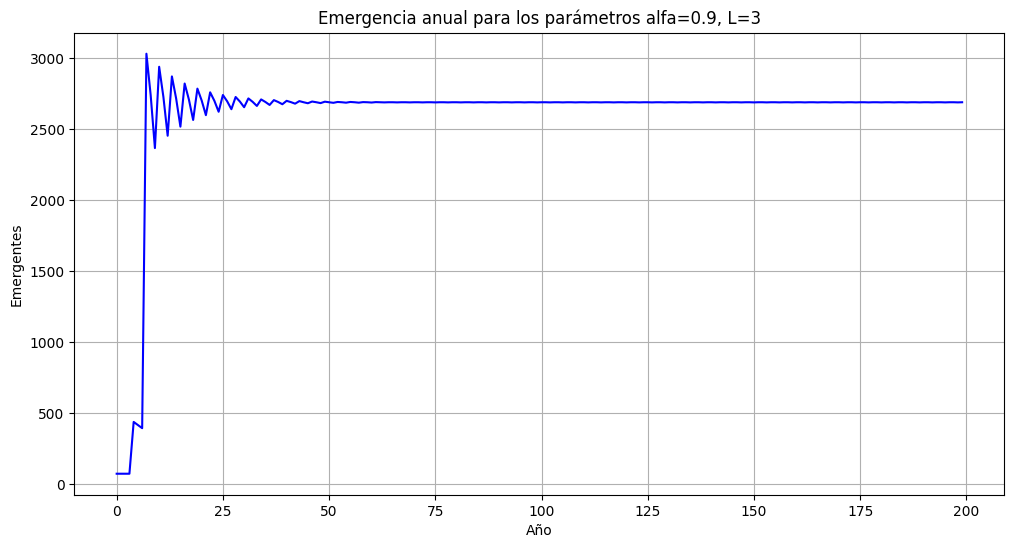

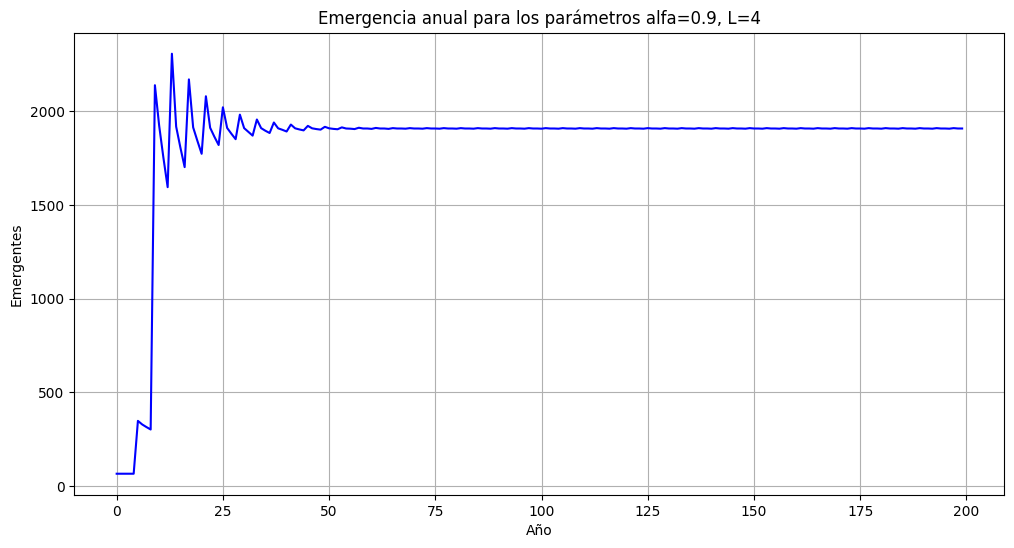

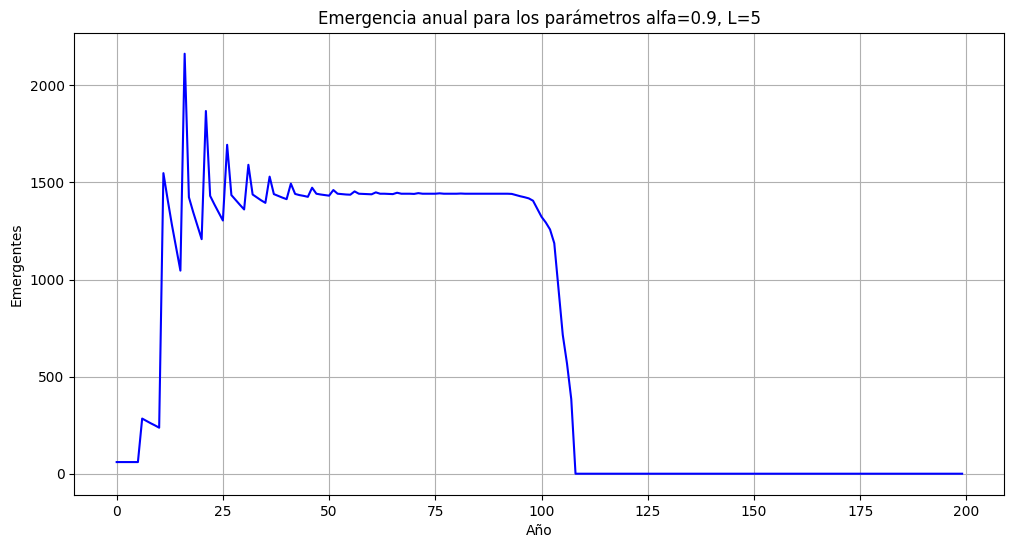

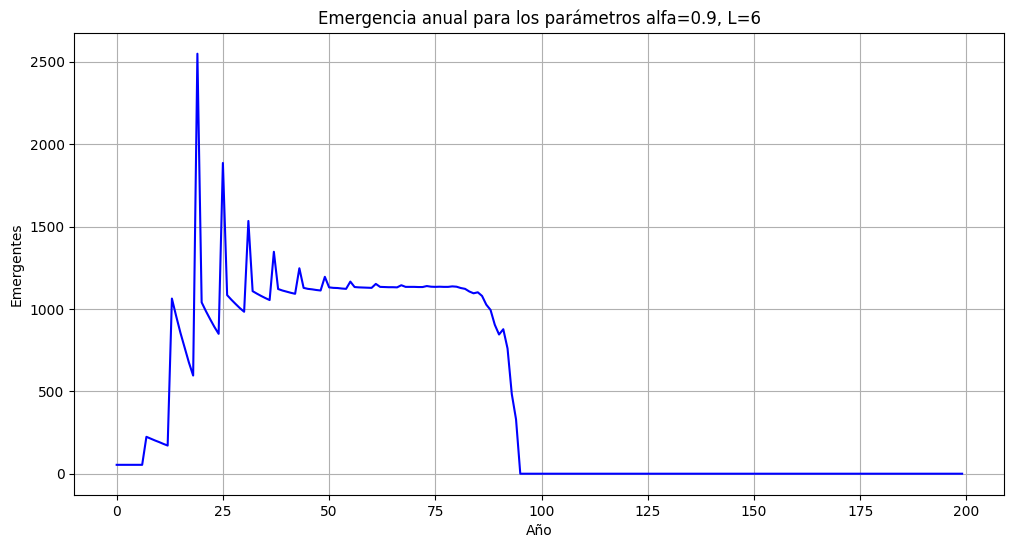

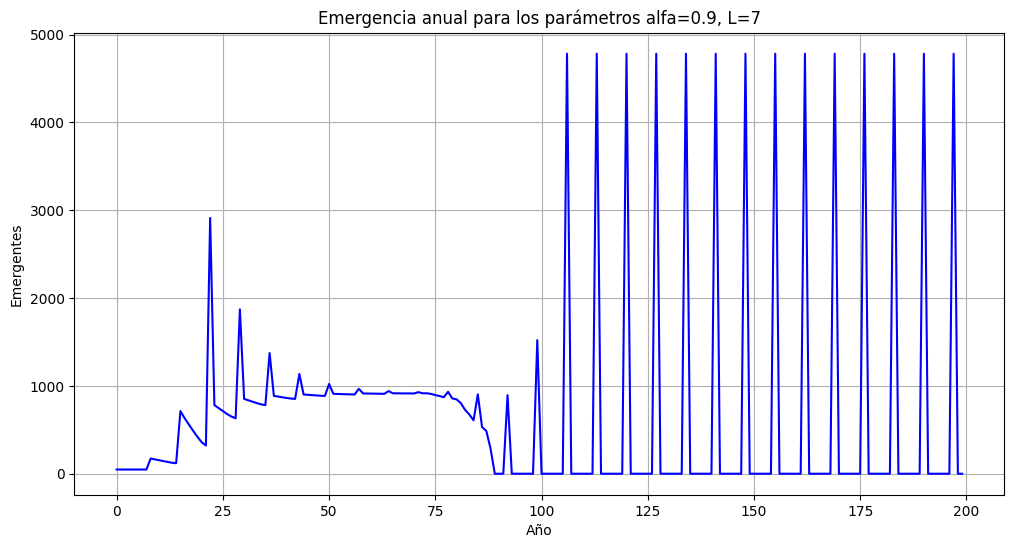

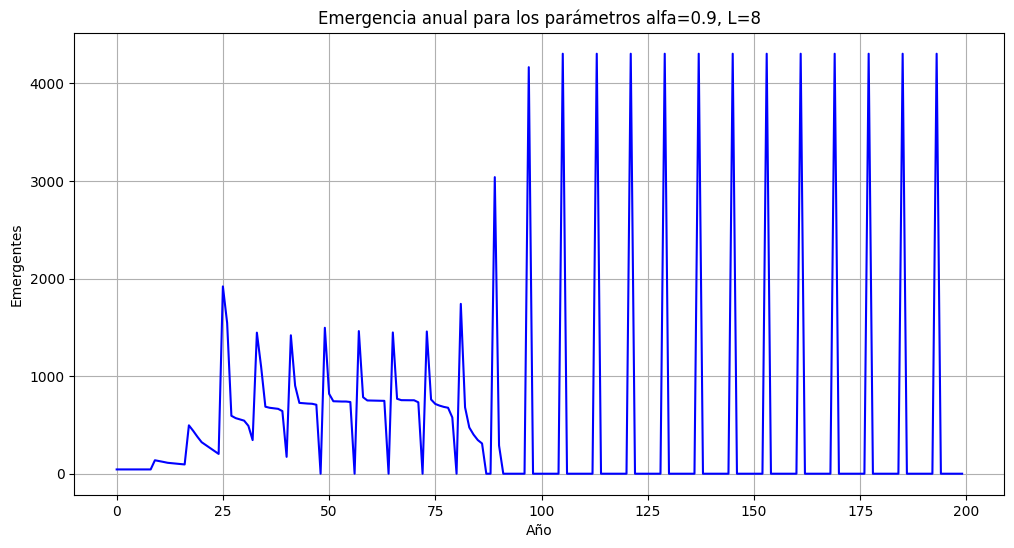

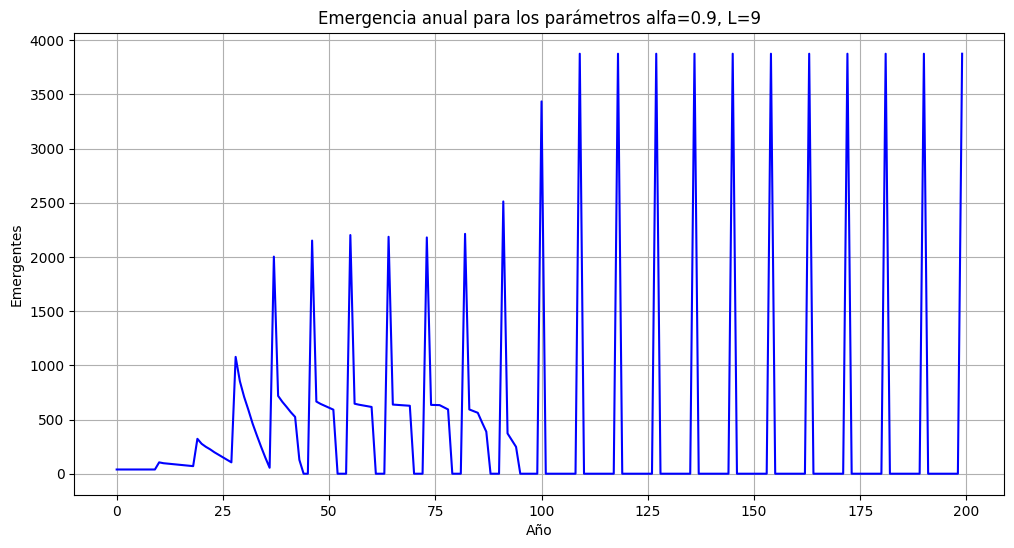

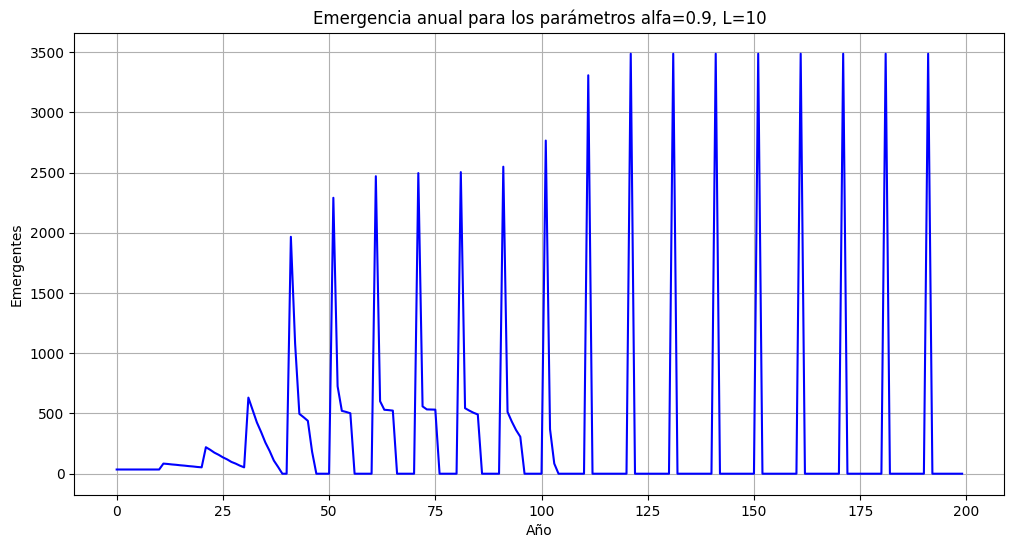

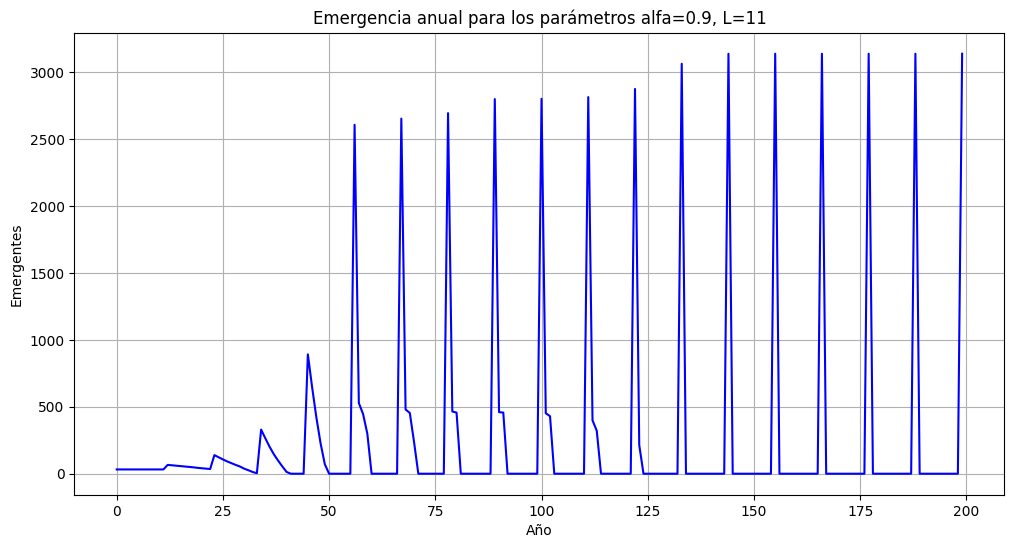

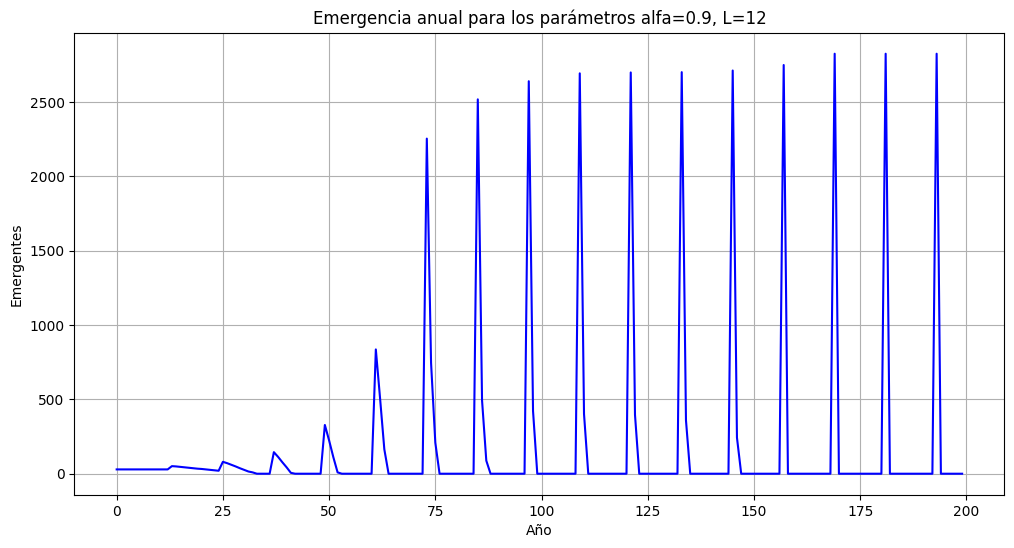

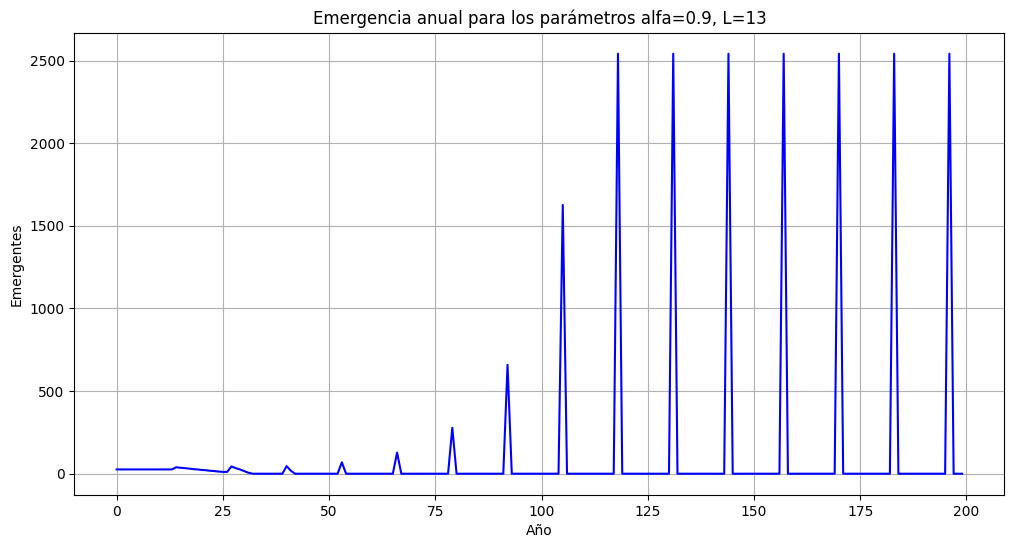

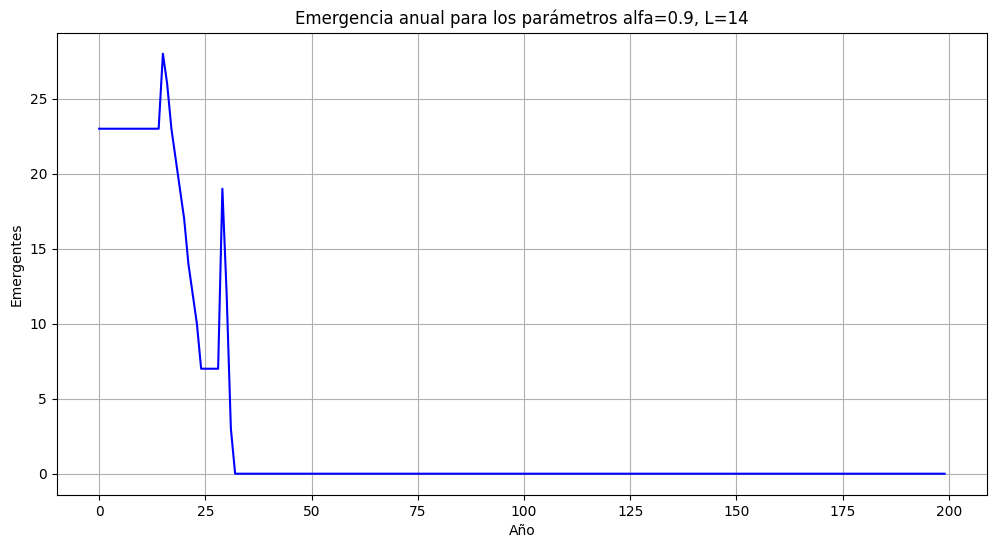

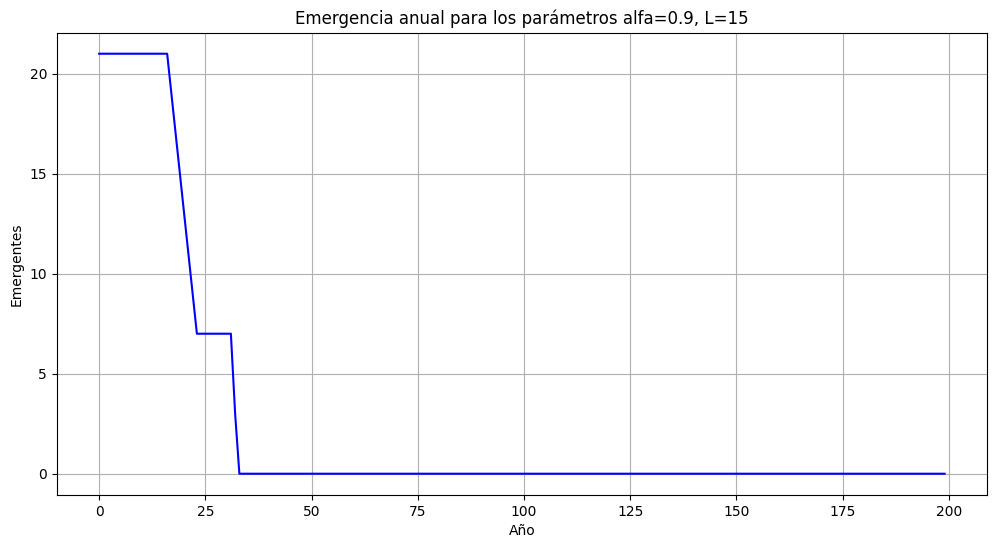

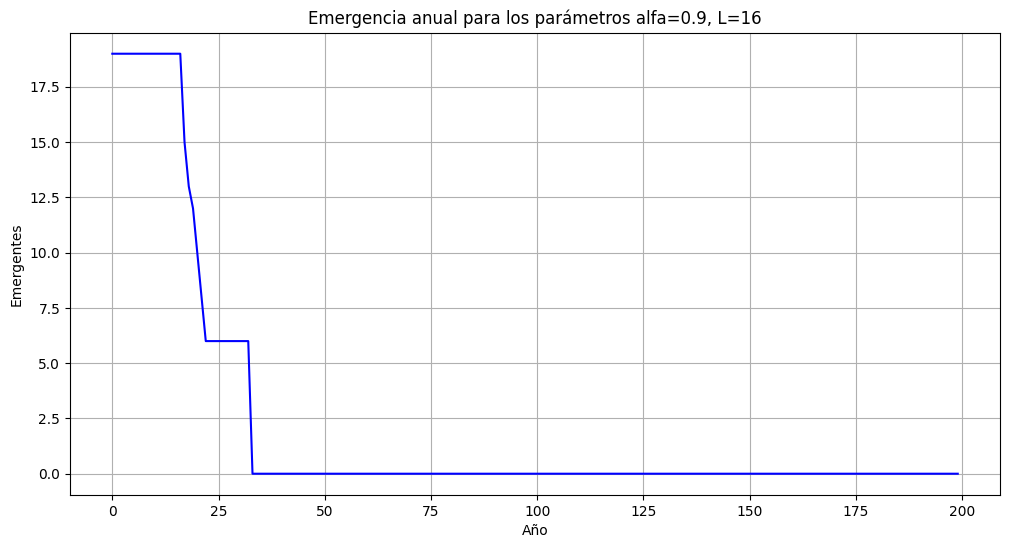

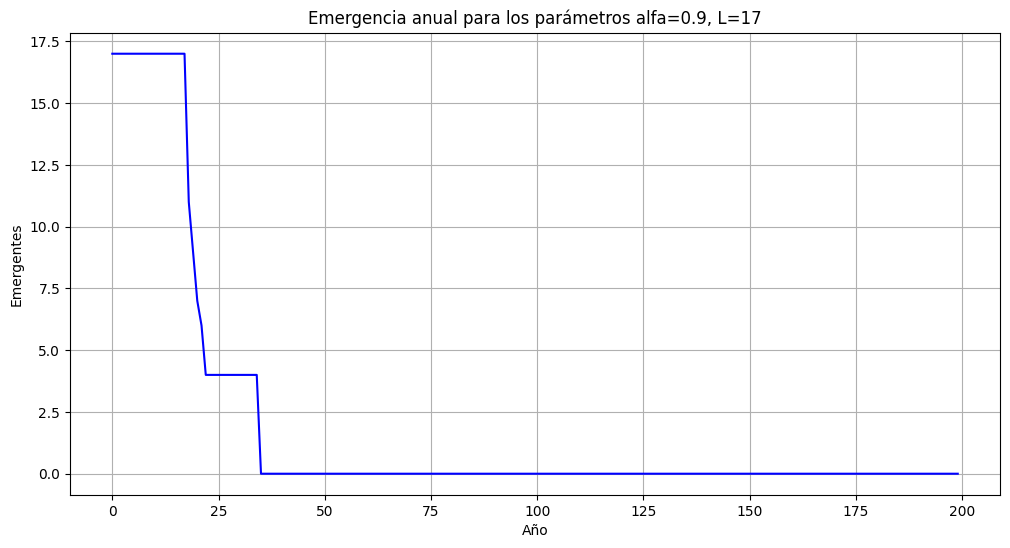

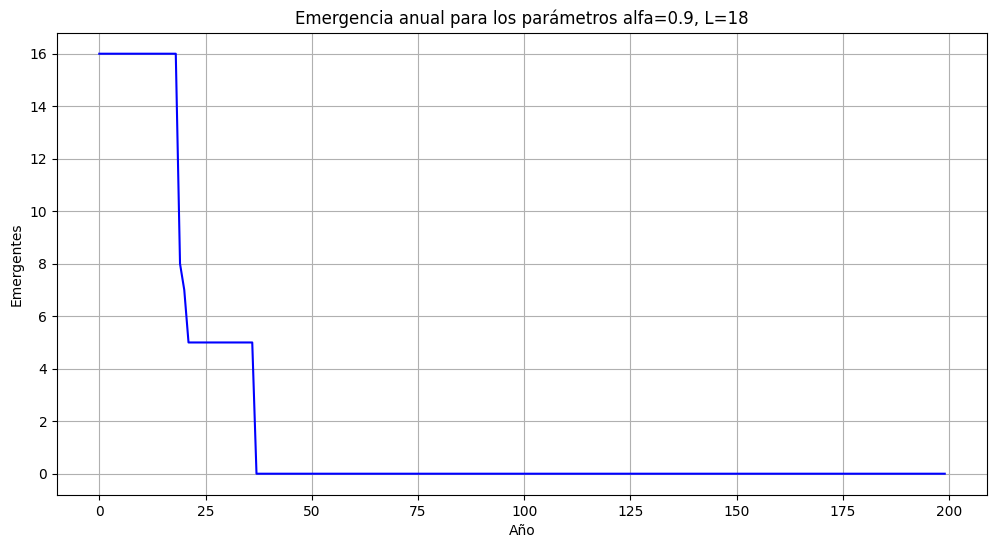

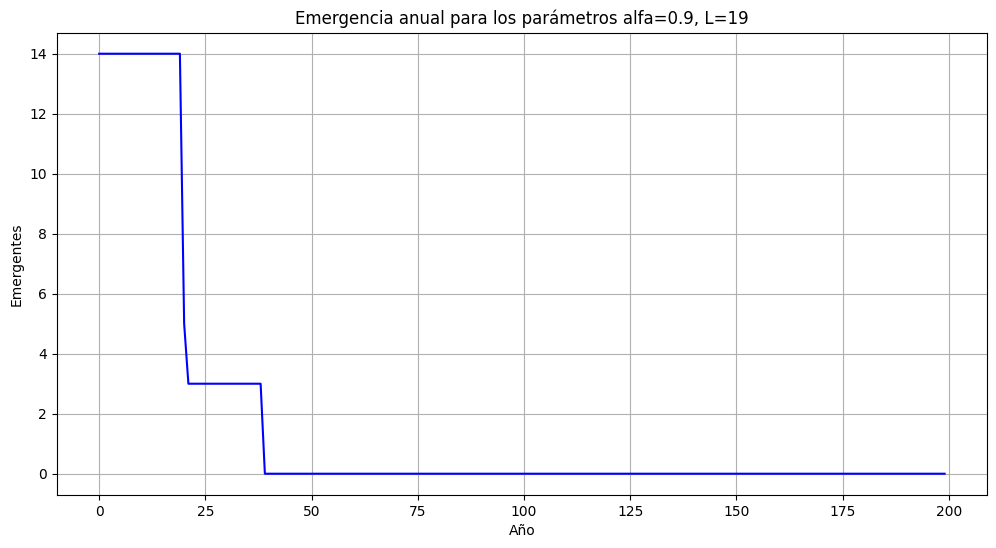

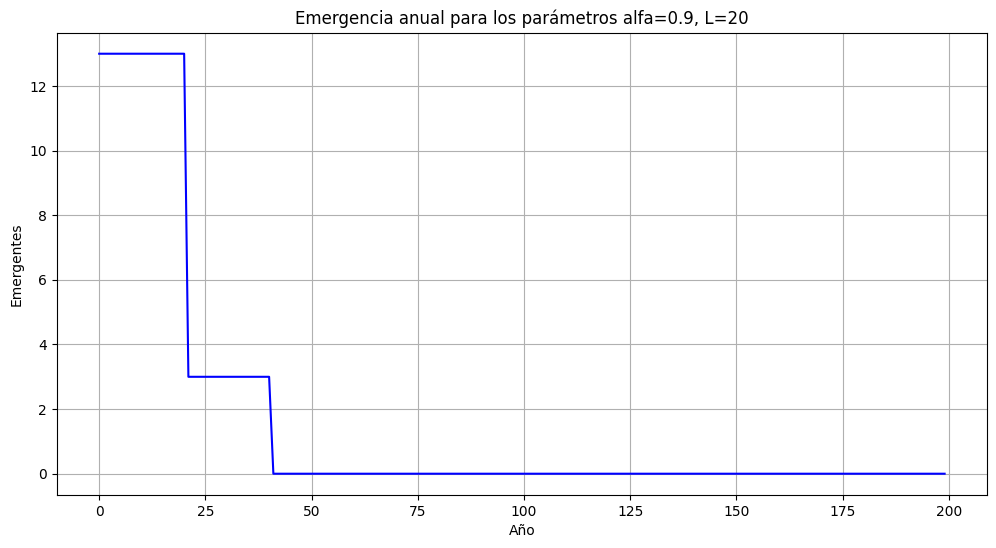

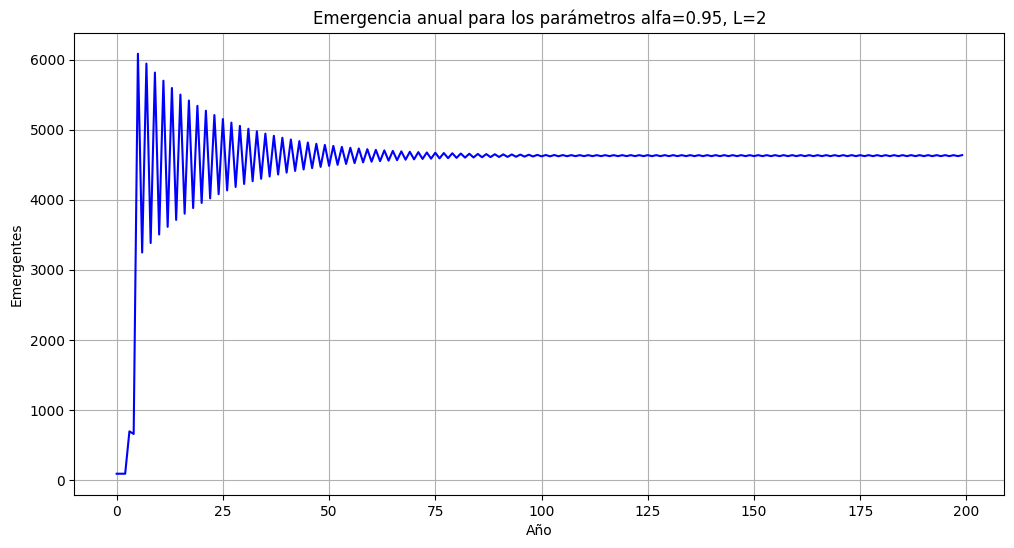

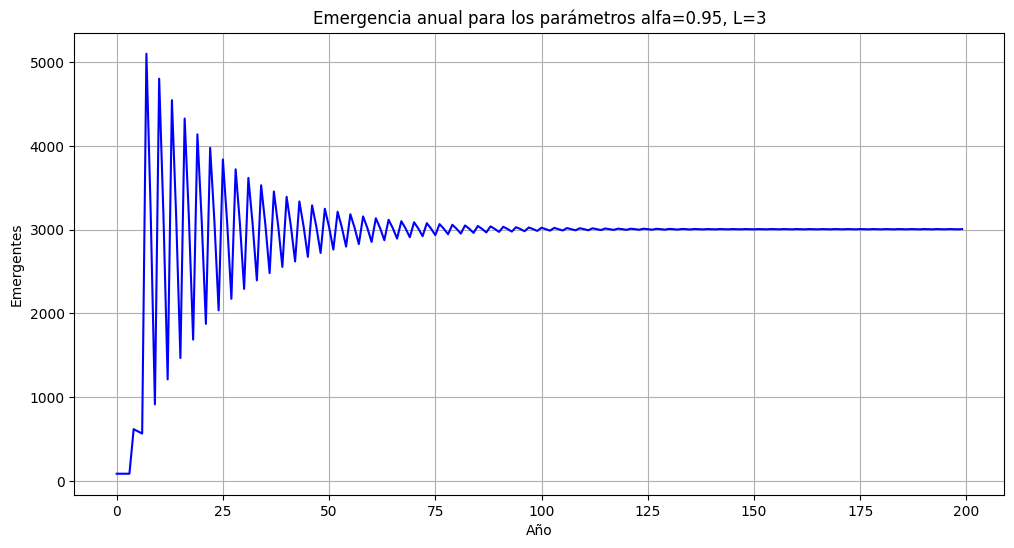

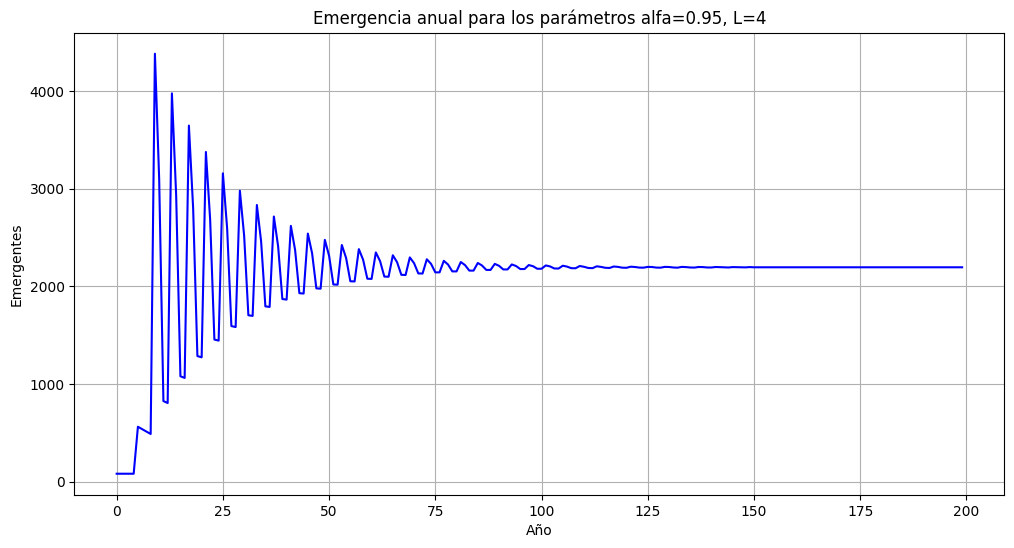

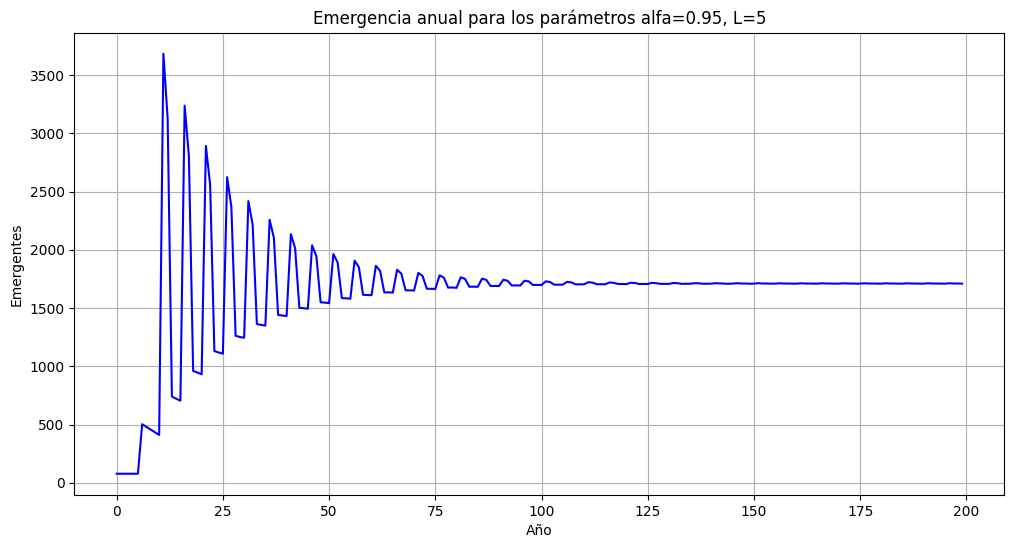

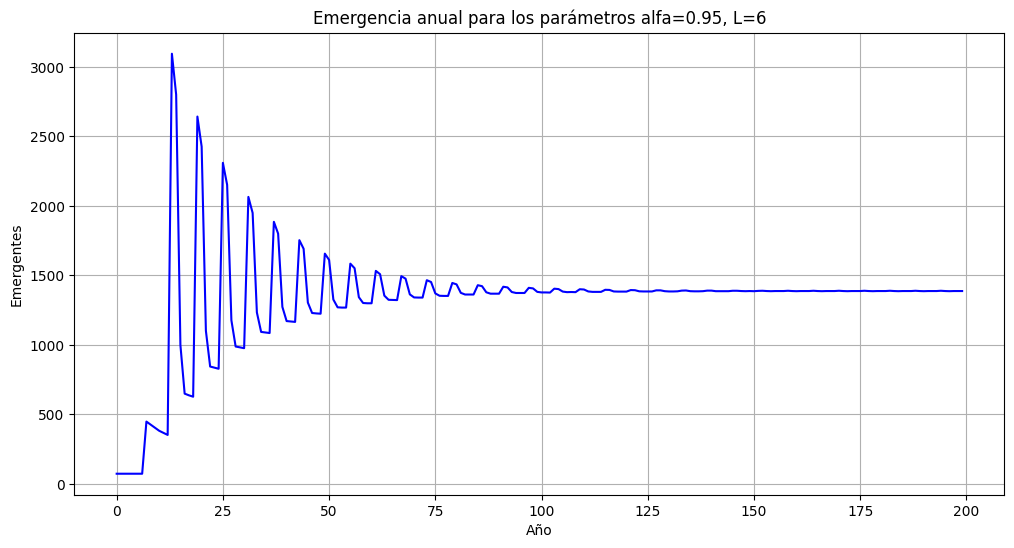

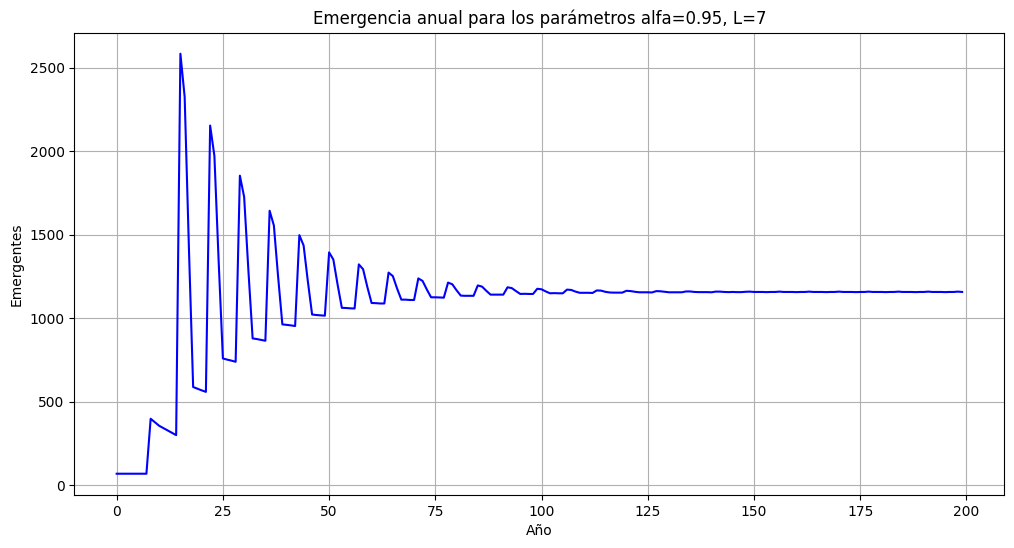

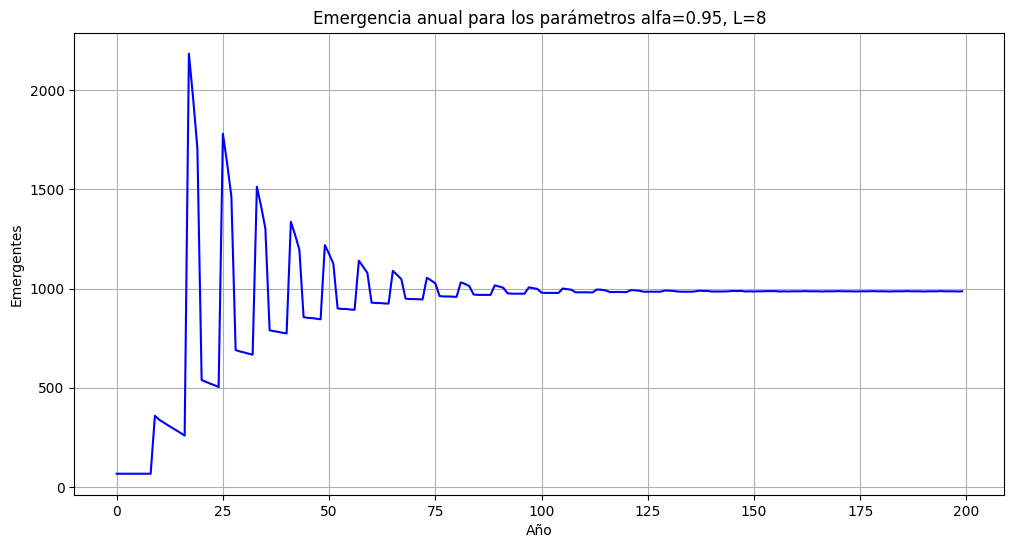

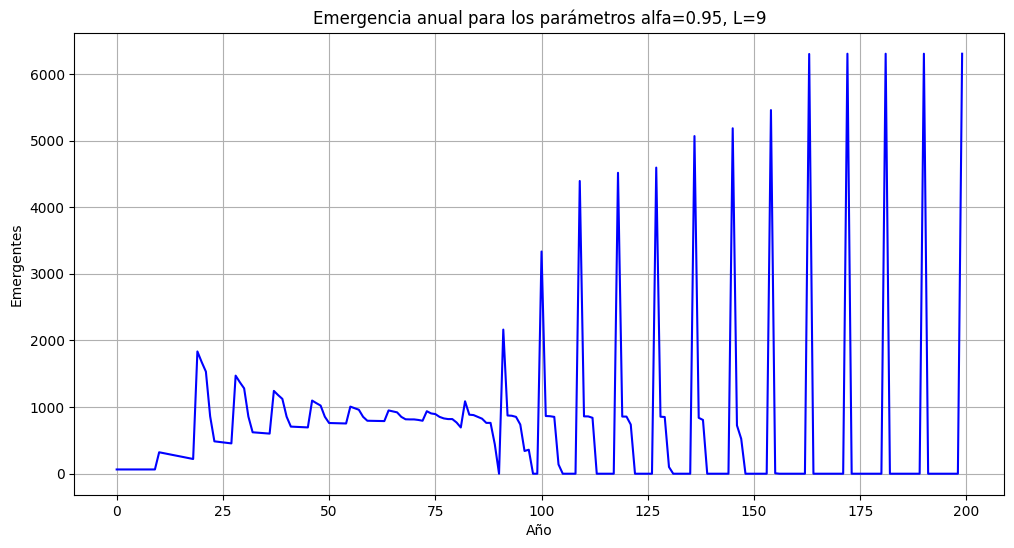

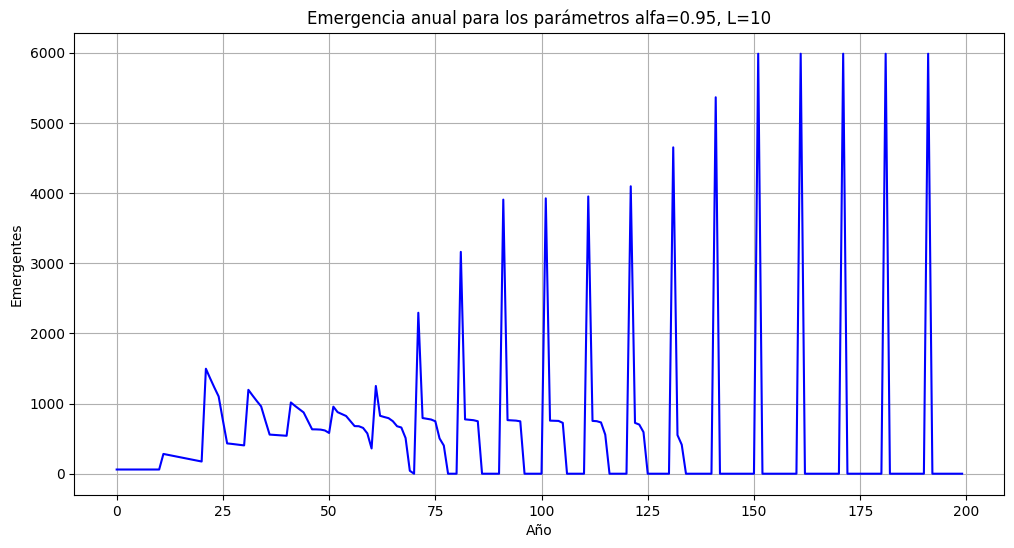

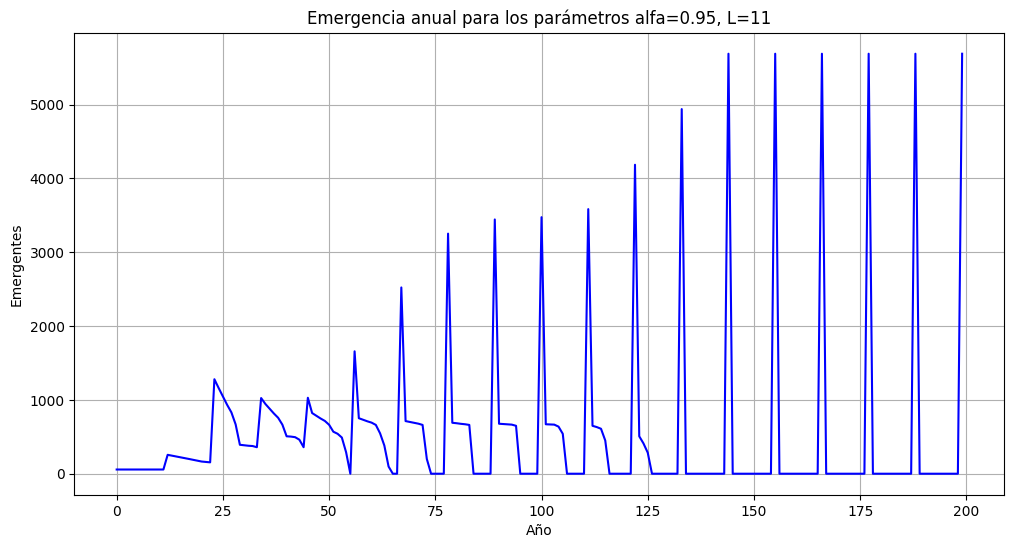

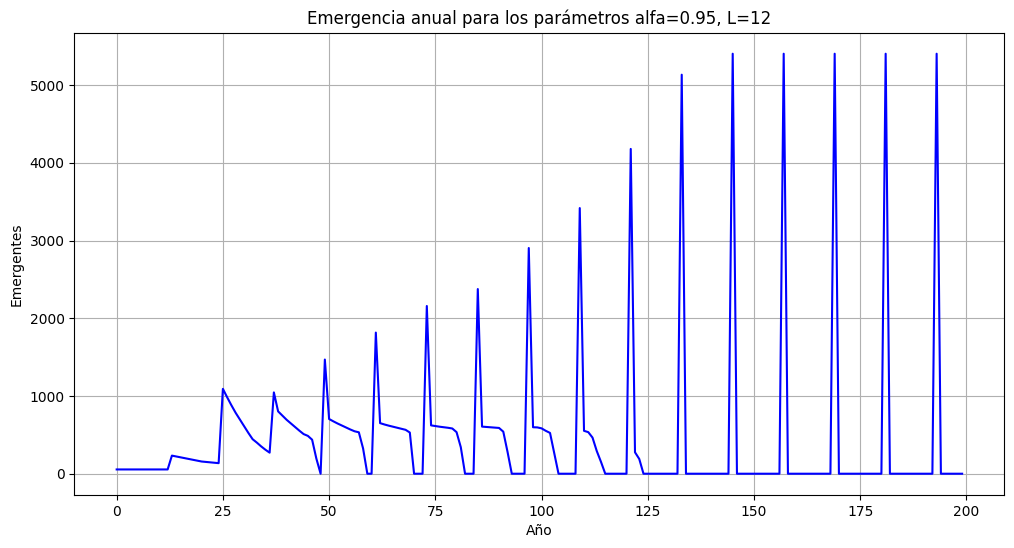

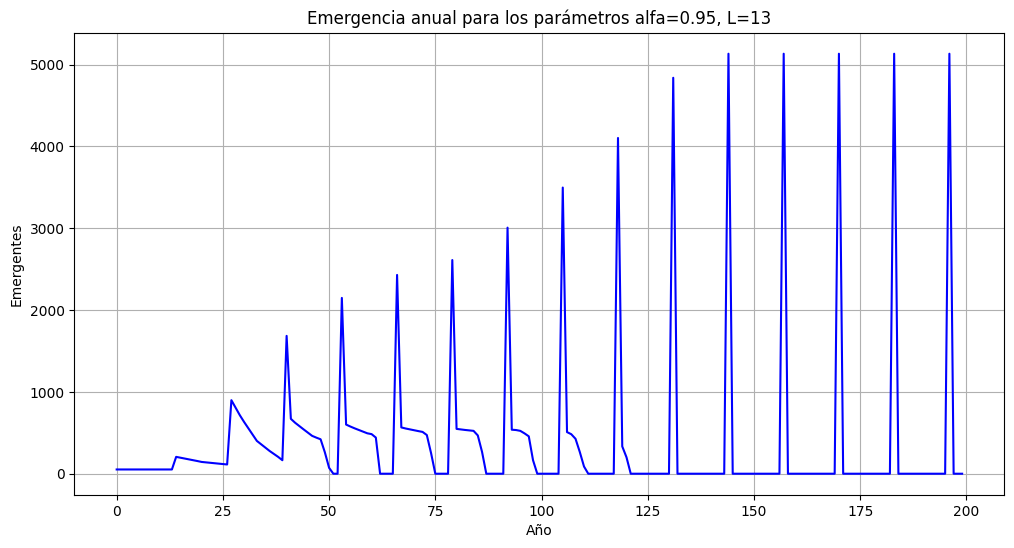

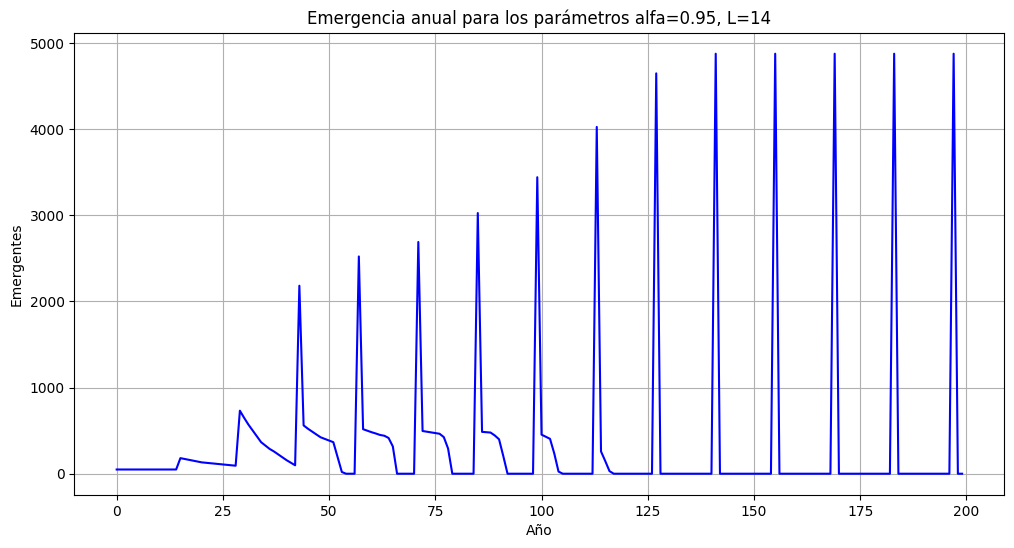

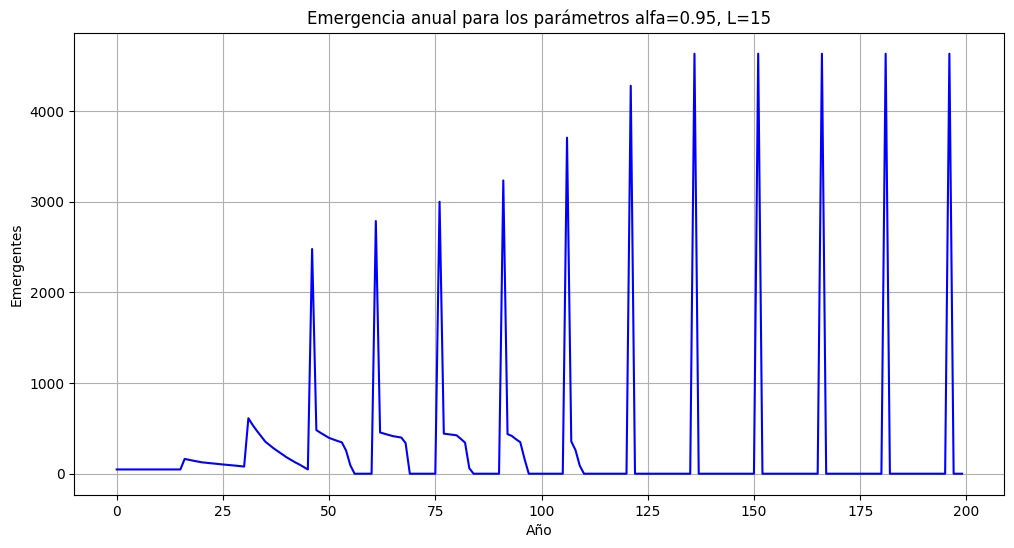

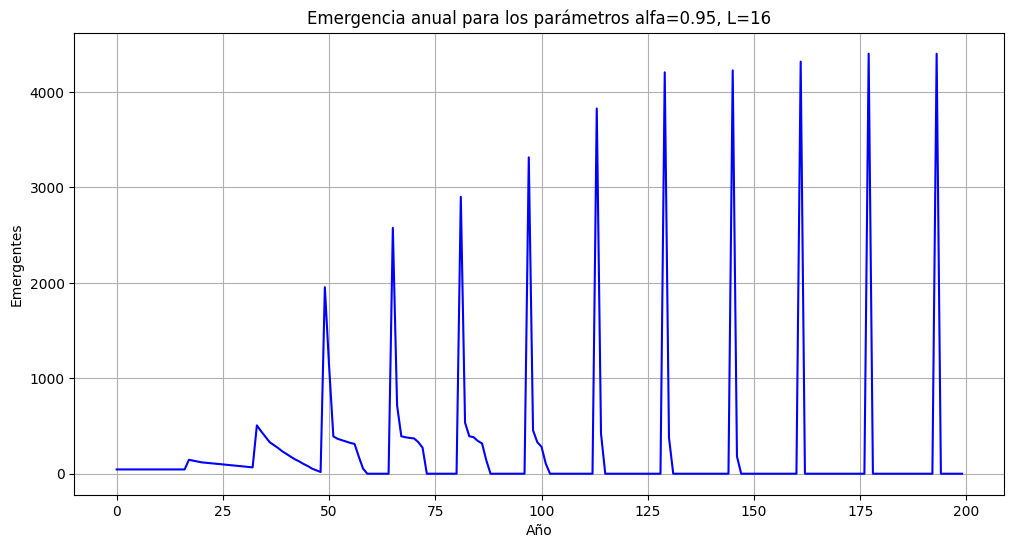

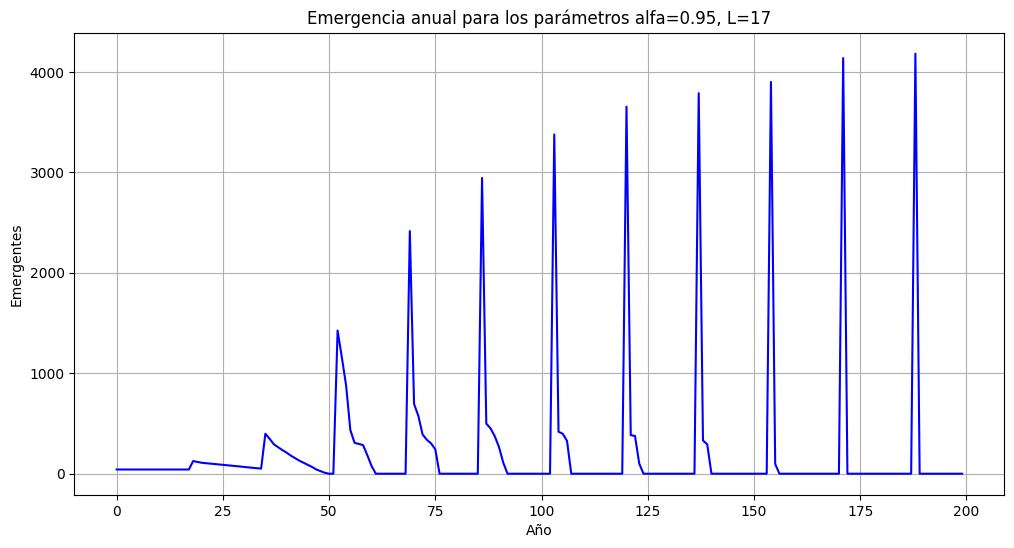

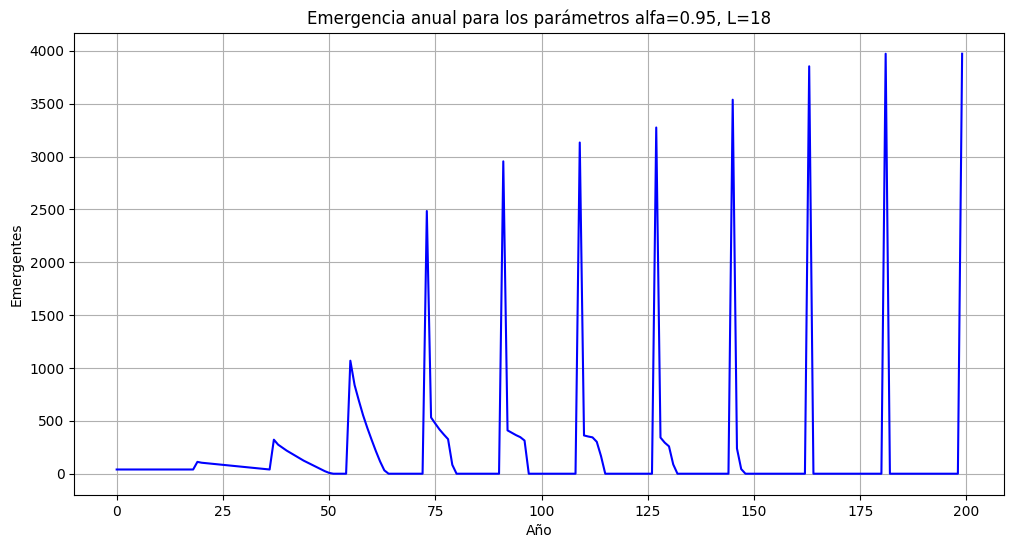

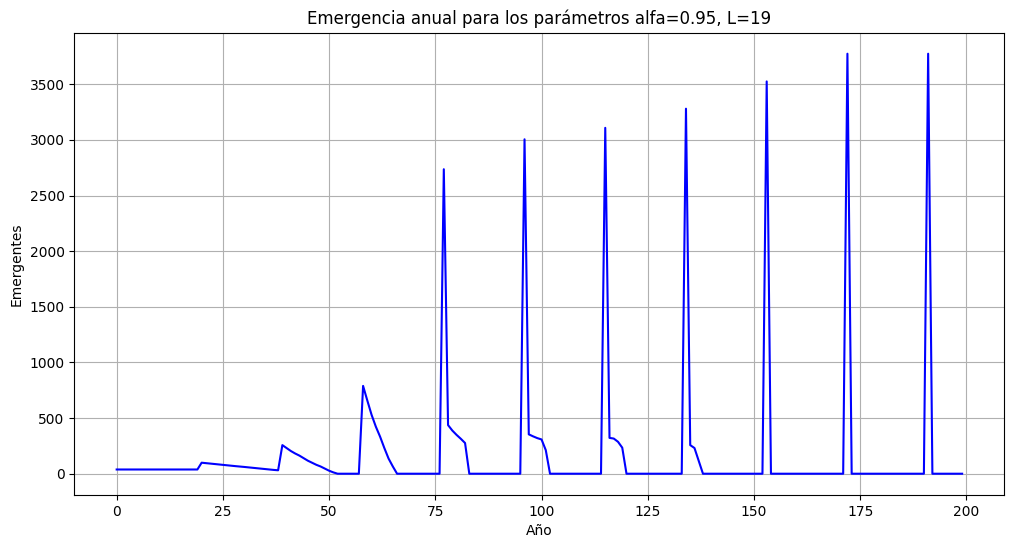

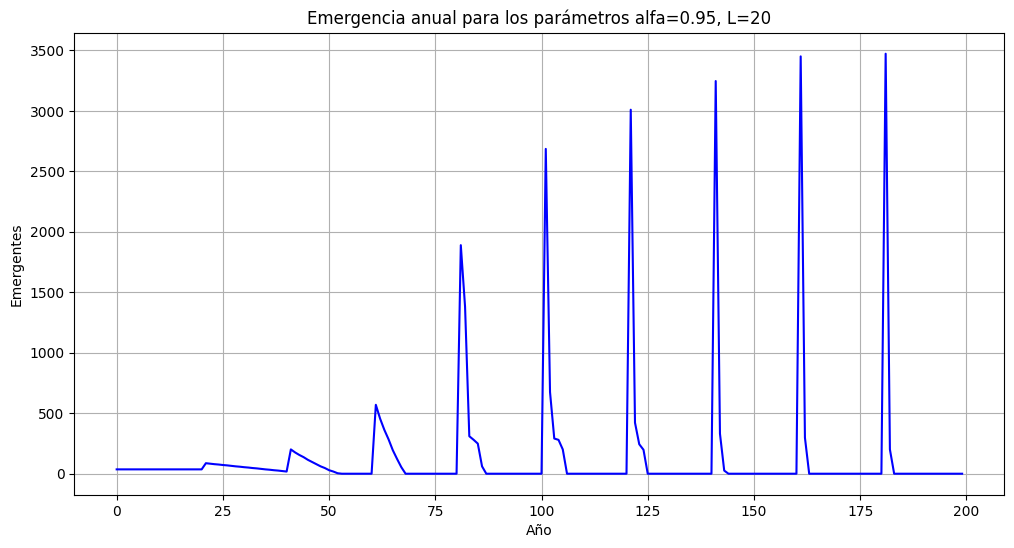

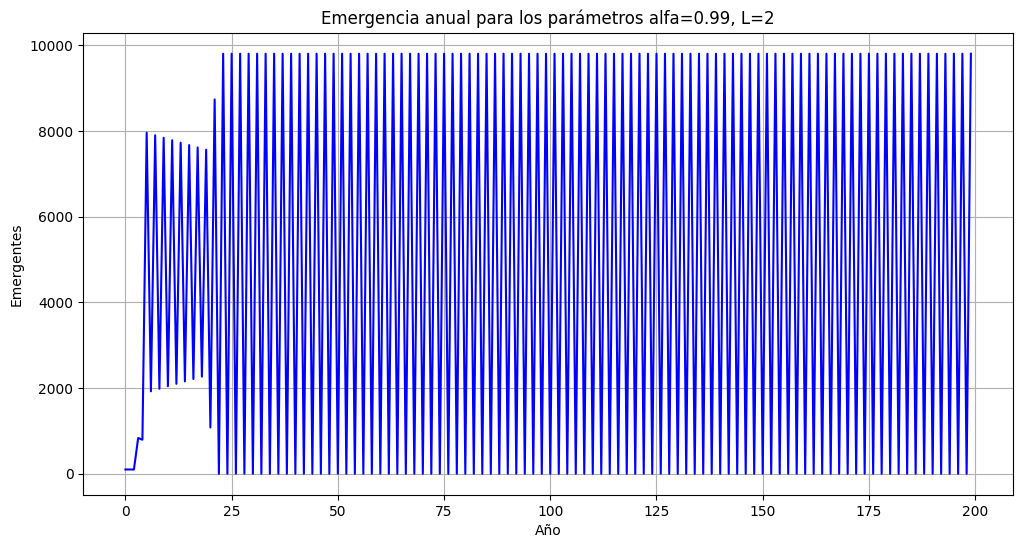

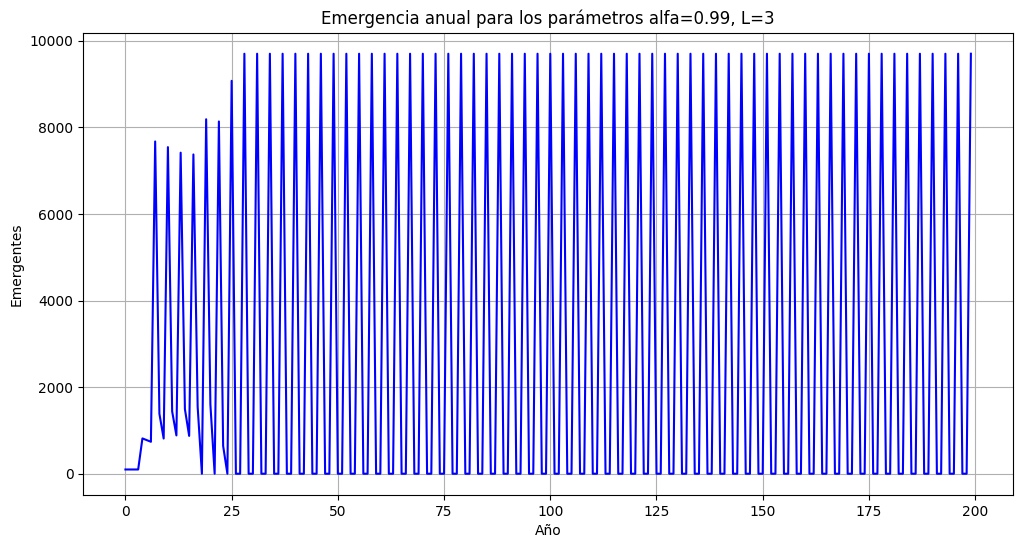

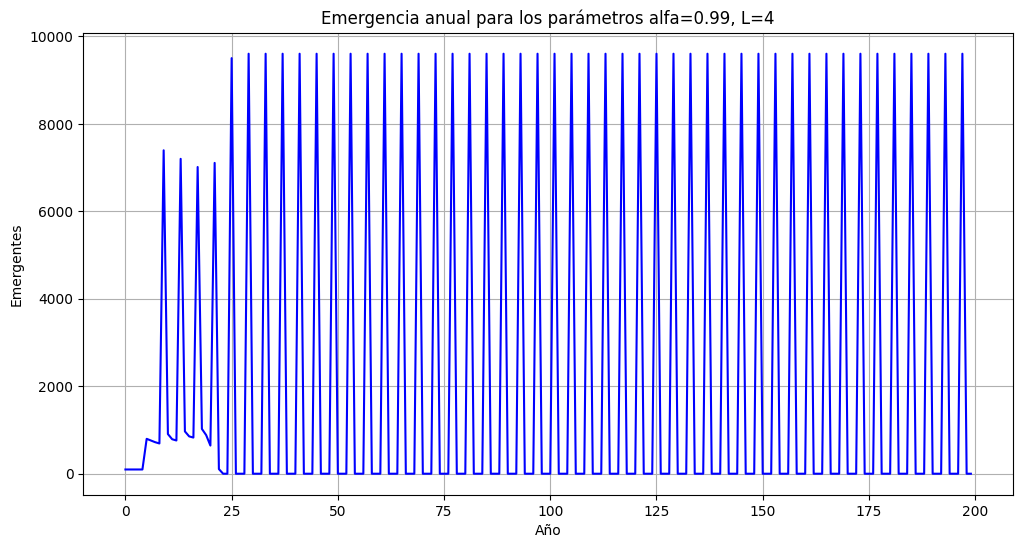

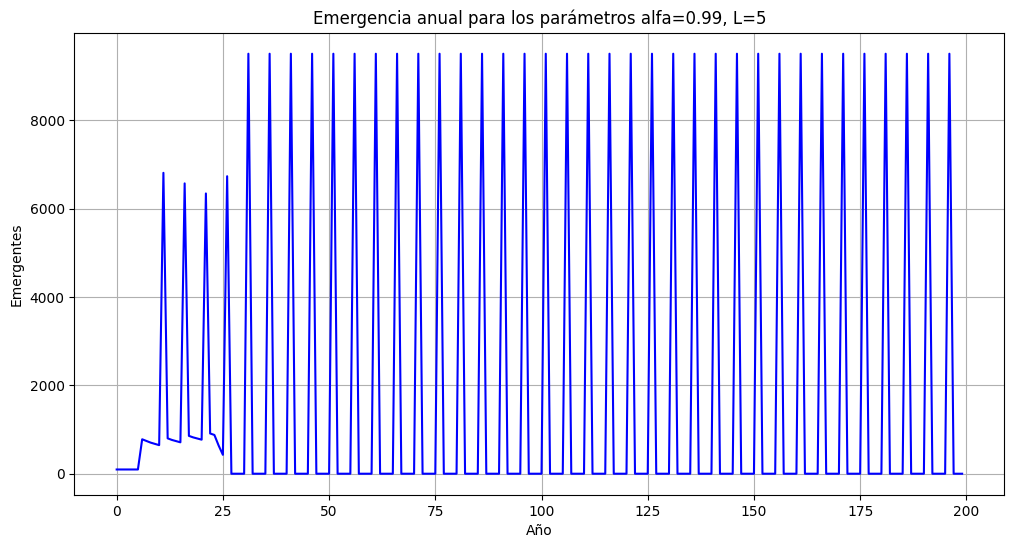

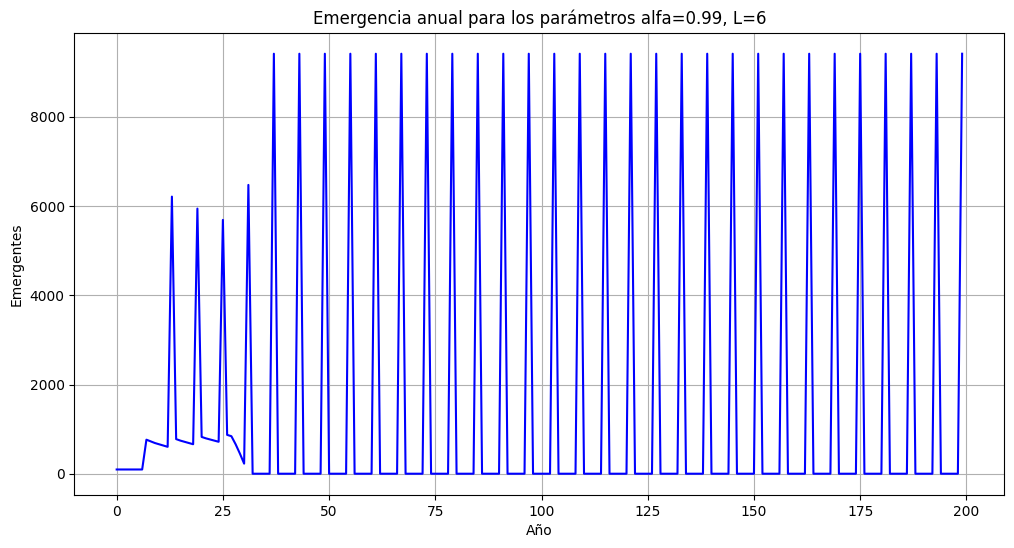

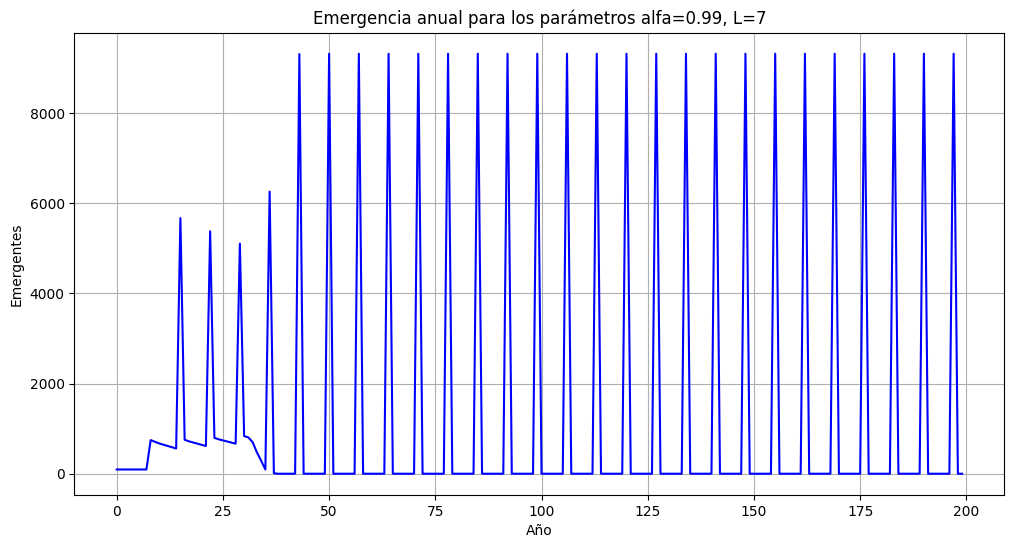

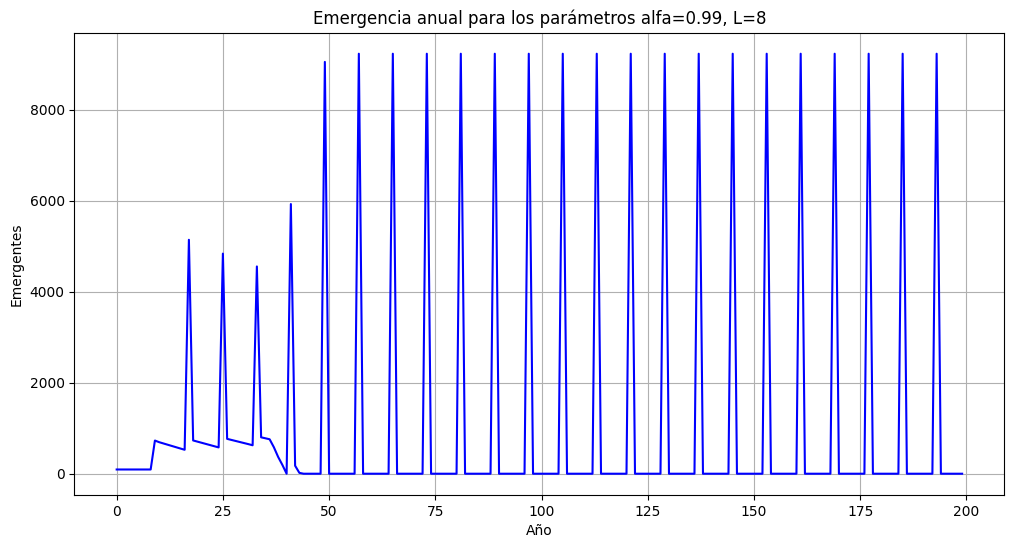

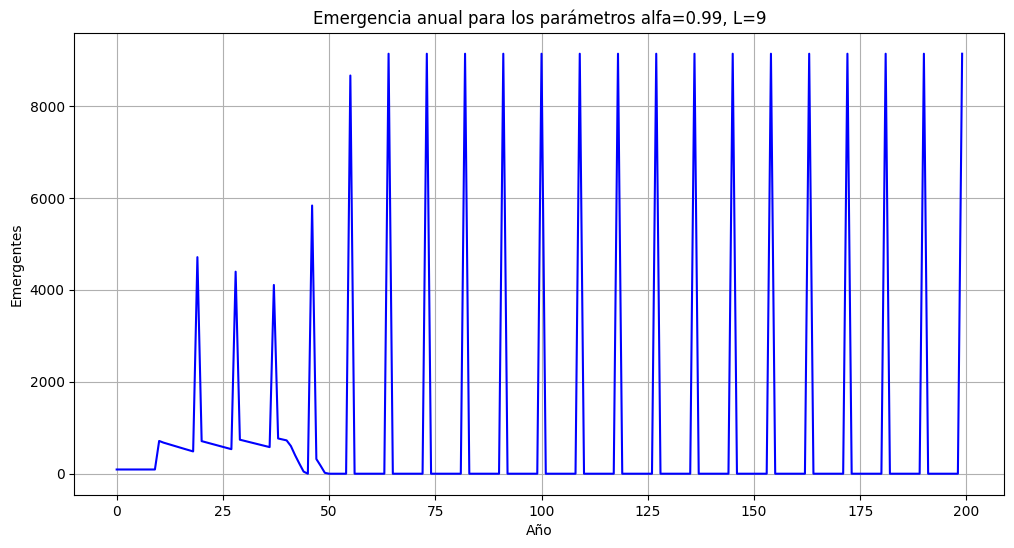

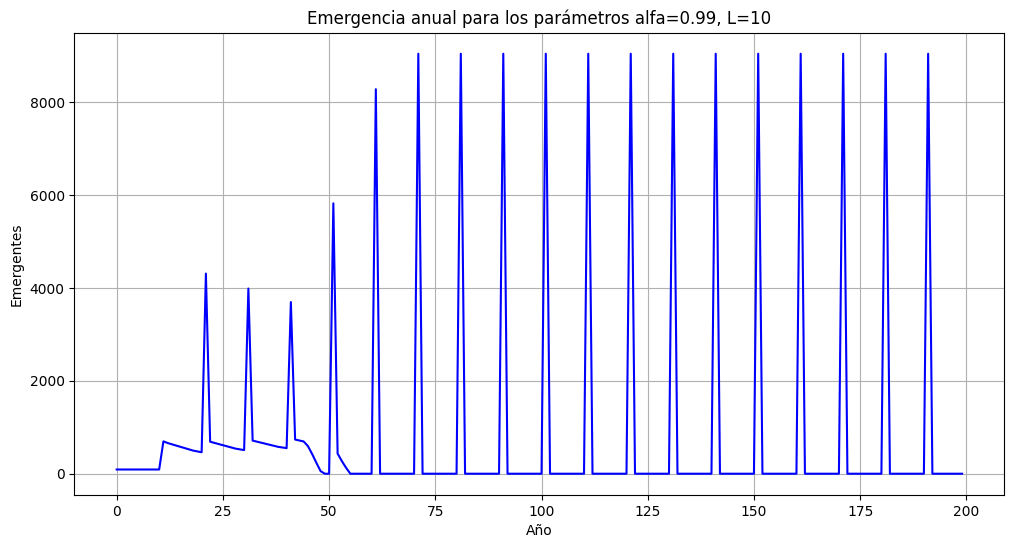

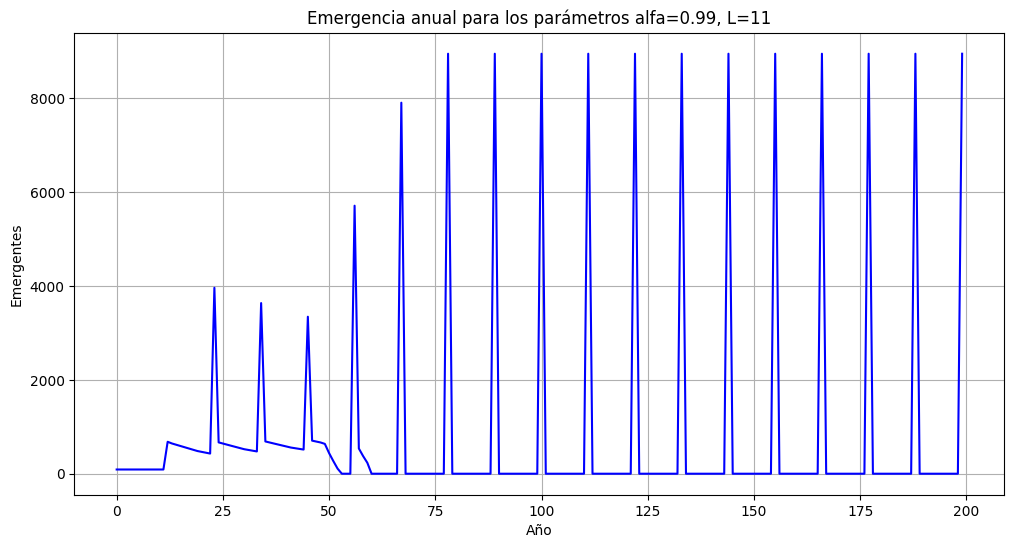

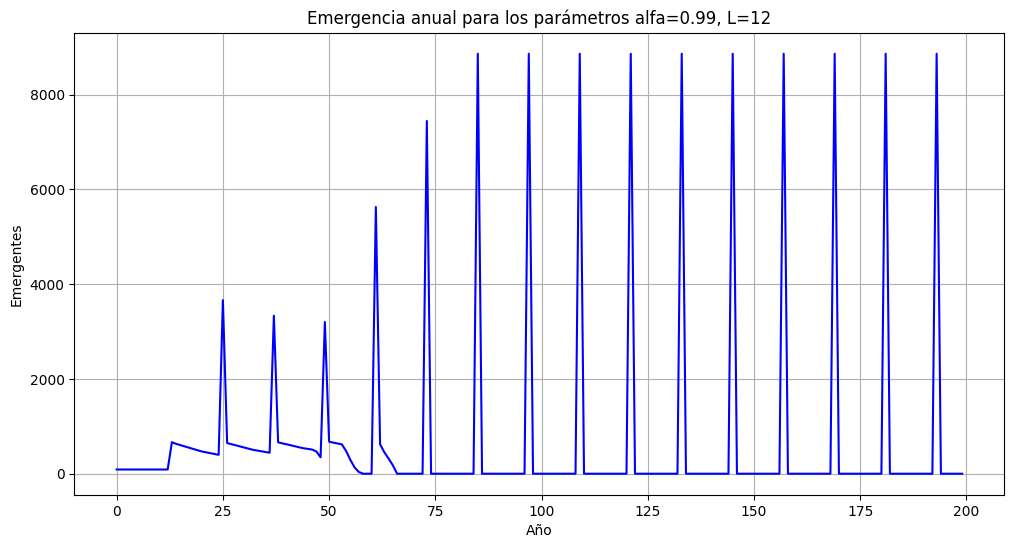

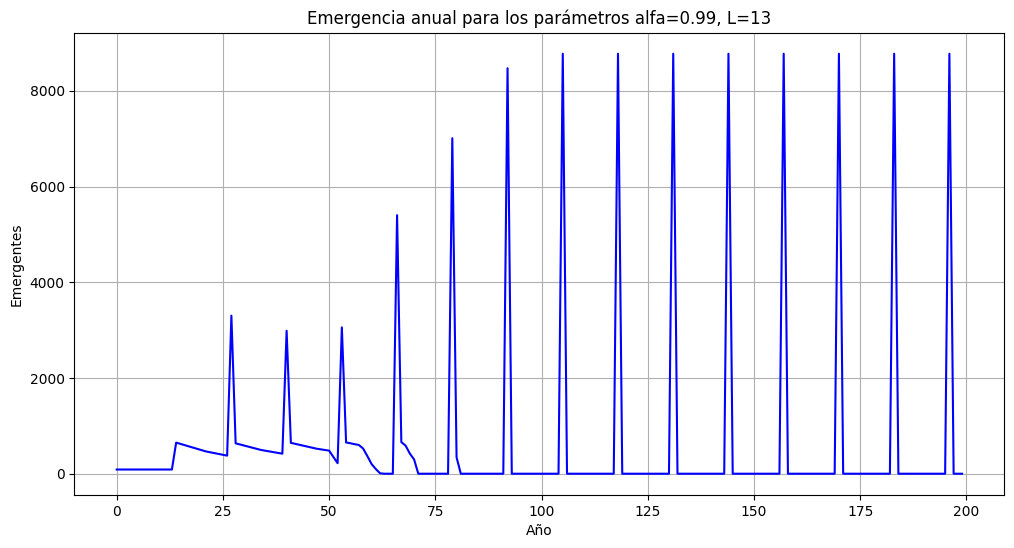

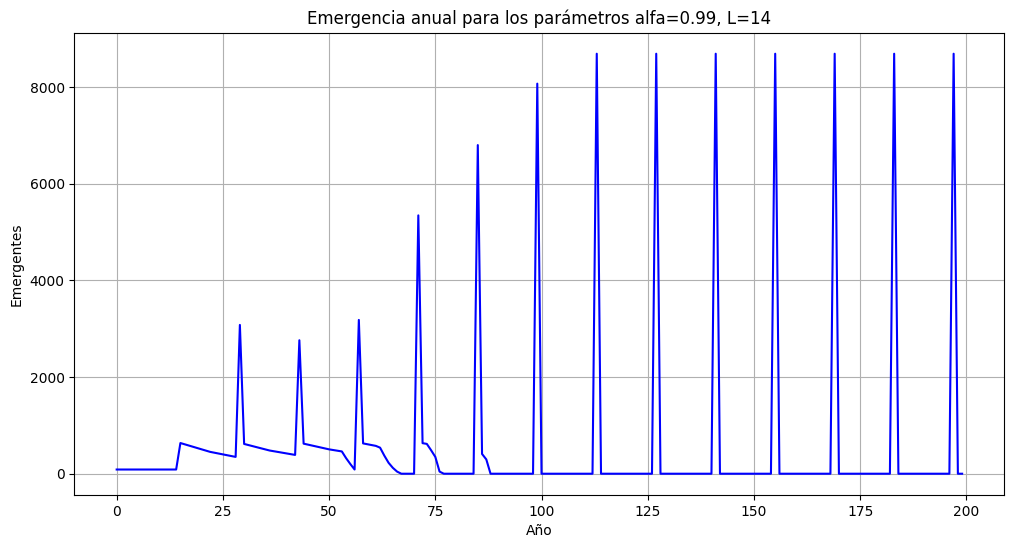

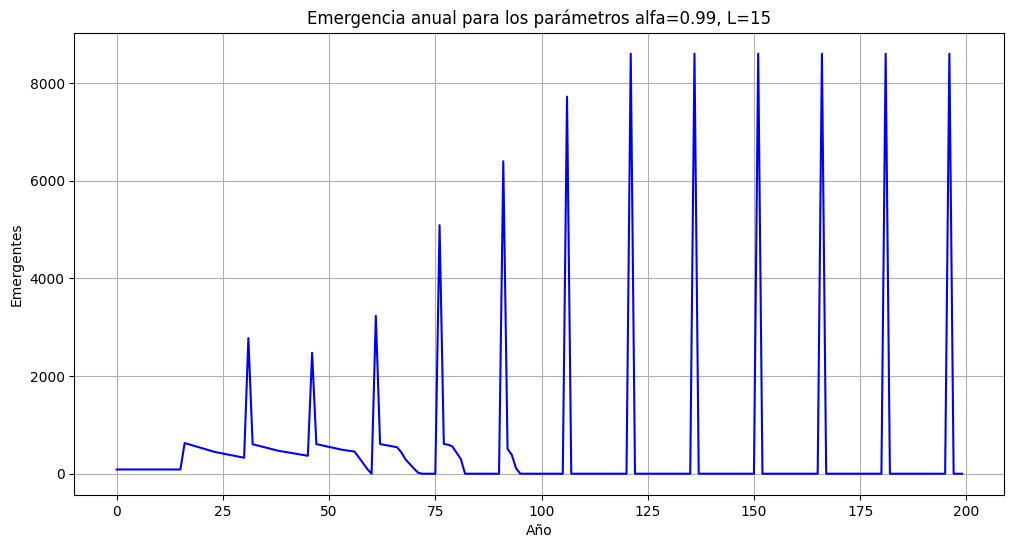

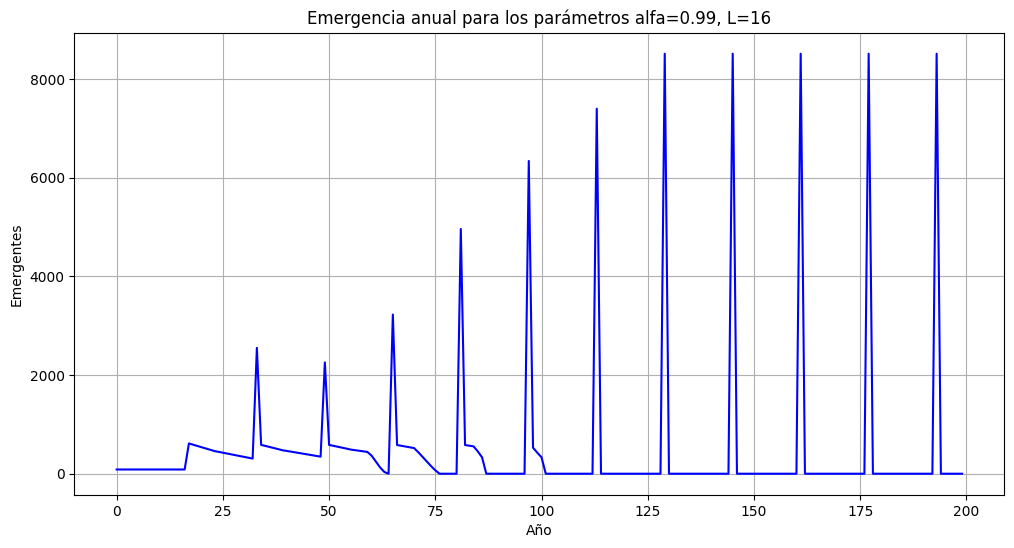

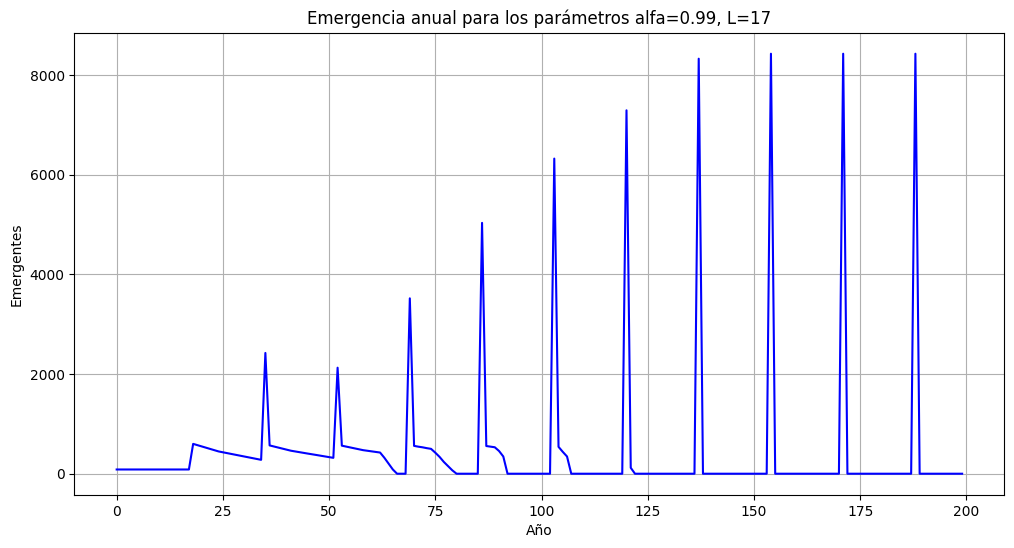

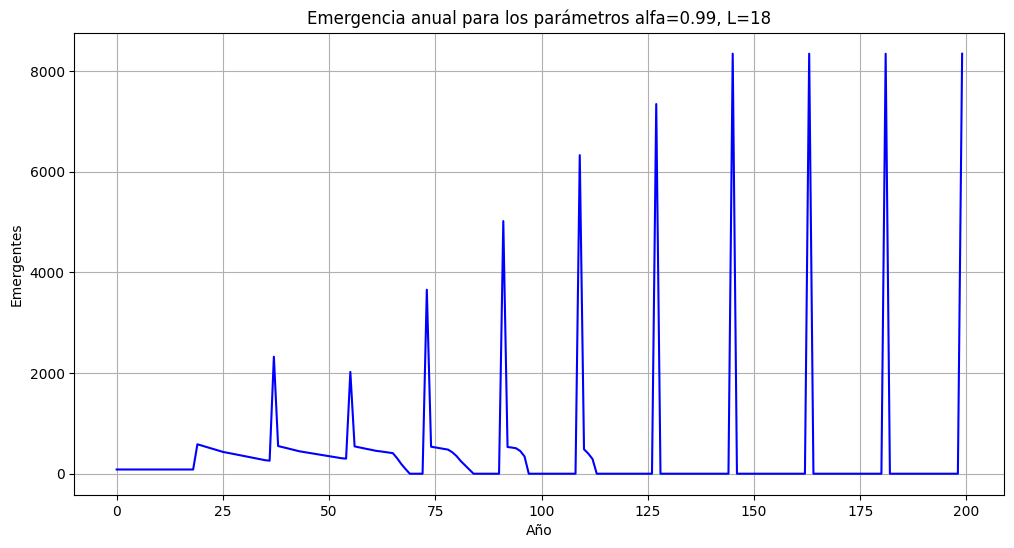

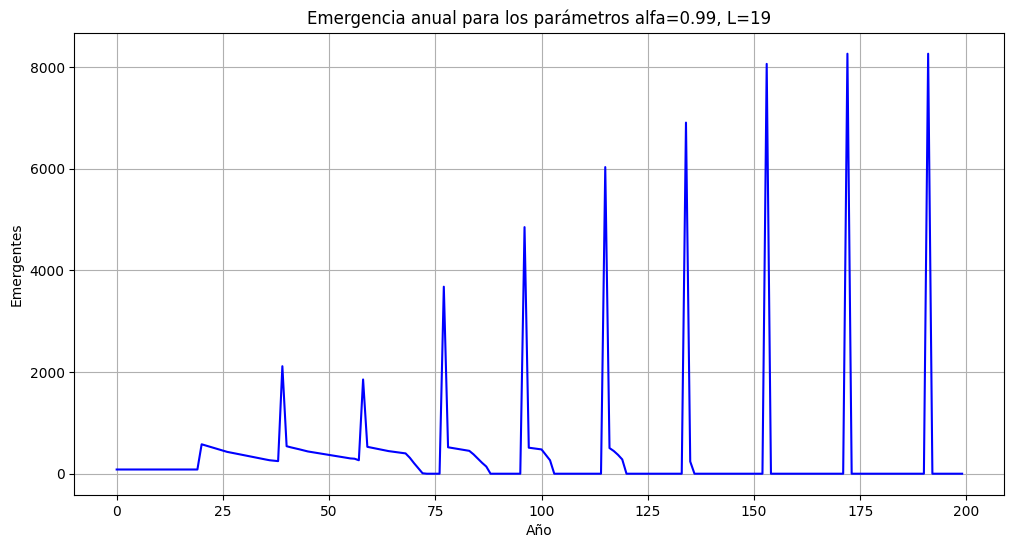

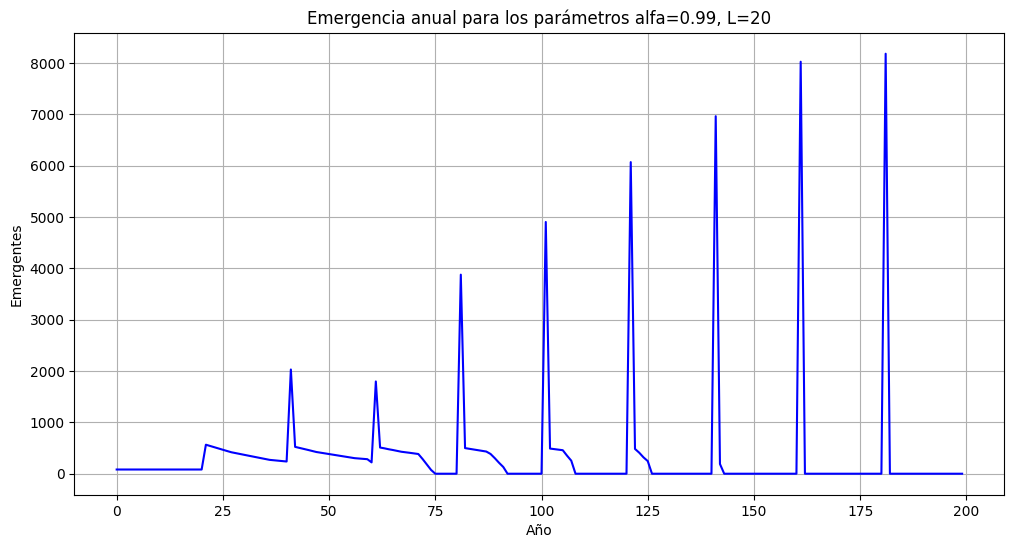

In [10]:
for supervivencia, ciclo in it.product(alfa, L):
    df = simulacion(x0, P0, K, n, A, R, supervivencia, ciclo, f)
    graficar(df, supervivencia, ciclo)